In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import re
import argparse
import csv
import json
import pprint
import subprocess
import dcor

tests_num = 10
tests_temperature = 0.7

In [14]:
def run_tests(check_program, timeout=40):
    try:
        result = subprocess.run(['python', '-c', check_program], stdout=subprocess.PIPE,
                                        stderr=subprocess.PIPE, timeout=timeout)
        

    except Exception as e:
        return "team5_LLM_CODE_verifier_TIMEOUT_ERROR", "team5_LLM_CODE_verifier_TIMEOUT_ERROR"
    # return result
    return result.stdout.decode('utf-8').strip(), result.stderr.decode('utf-8').strip()


In [6]:
df = pd.read_csv('test_cases_results.csv')
temp = pd.read_json('human-eval-modified-with-tests.jsonl', lines=True)
df['test'] = temp['test']
df.head()

,task_id,prompt,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_1_avg_outputs_similarity,GPT4_10_generated_tests_1_outputs,GPT4_10_generated_tests_1_outputs_similarity,GPT4_10_generated_tests_0.7_outputs,GPT4_10_generated_tests_0.7_outputs_similarity,GPT4_10_generated_tests_0.7_avg_outputs_similarity,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_1,test
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,100.0,100.0,"[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,100.0,100.0,"[['[]', '[]', '[]', '[]', '[]', '[]'], [""['()'...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[""['((()))']"", ""['((()))']"", ""['((()))']"", ""[...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,separate_paren_groups('((()))')#lak#separate_p...,separate_paren_groups('')#lak#separate_paren_g...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,100.0,100.0,"[['0.0', '0.0', '0.0', '0.0', '0.0', '0.0'], [...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['0.7599999999999998', '0.7599999999999998', ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,truncate_number(4.76)#lak#truncate_number(0.99...,truncate_number(5.0)#lak#truncate_number(1.987...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,100.0,100.0,"[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...","below_zero([10, -5, 5, -10])#lak#below_zero([1...","\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,100.0,90.0,"[['1.2', '1.2', '1.2', '1.2', '1.2', '1.2'], [...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[['1.0', '1.0', '1.0', '1.0', '1.0', '1.0'], [...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...","mean_

In [17]:
id = df.iloc[37]['task_id']
prompt = df.iloc[37]['prompt']
codes = list(df.iloc[37][['code_0', 'code_1', 'code_2', 'code_3', 'code_4', 'code_5']])
tests = df.iloc[37][f'GPT4_{tests_num}_generated_tests_{tests_temperature}'].split('#lak#')

print(id)
print(prompt)
print('----------------')
for test in tests:
    print(test)

HumanEval/38


def encode_cyclic(s: str):
    """
    returns encoded string by cycling groups of three characters.
    """
    # split string to groups. Each of length 3.
    groups = [s[(3 * i):min((3 * i + 3), len(s))] for i in range((len(s) + 2) // 3)]
    # cycle elements in each group. Unless group has fewer elements than 3.
    groups = [(group[1:] + group[0]) if len(group) == 3 else group for group in groups]
    return "".join(groups)


def decode_cyclic(s: str):
    """
    takes as input string encoded with encode_cyclic function. Returns decoded string.
    """

----------------
decode_cyclic(encode_cyclic("abc"))
decode_cyclic(encode_cyclic("abcdef"))
decode_cyclic(encode_cyclic("abcde"))
decode_cyclic(encode_cyclic("hello world"))
decode_cyclic(encode_cyclic("Python"))
decode_cyclic(encode_cyclic("123456789"))
decode_cyclic(encode_cyclic("test"))
decode_cyclic(encode_cyclic("a"))
decode_cyclic(encode_cyclic("xy"))
decode_cyclic(encode_cyclic(""))


In [18]:
for code in codes:
    print(code)
    print('----------------')

def decode_cyclic(s: str):
    """
    takes as input string encoded with encode_cyclic function. Returns decoded string.
    """
    # split string to groups. Each of length 3.
    groups = [s[(3 * i):min((3 * i + 3), len(s))] for i in range((len(s) + 2) // 3)]
    # inverse cycle elements in each group. Unless group has fewer elements than 3.
    groups = [(group[-1] + group[:-1]) if len(group) == 3 else group for group in groups]
    return "".join(groups)
----------------
def decode_cyclic(s: str):
    """
    takes as input string encoded with encode_cyclic function. Returns decoded string.
    """
    groups = [s[(3 * i):min((3 * i + 3), len(s))] for i in range((len(s) + 2) // 3)]
    groups = [(group[-1] + group[:2]) if len(group) == 3 else group for group in groups]
    return "".join(groups)
----------------
def decode_cyclic(s: str):
    """
    takes as input string encoded with encode_cyclic function. Returns decoded string.
    """
    # split string into groups. Each of l

In [19]:
import ast
outputs = df.iloc[37][f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs']
sims = df.iloc[37][f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs_similarity']

outputs = ast.literal_eval(outputs)
sims = ast.literal_eval(sims)

for i in range(10):
    print(outputs[i])
    print(sims[i])

['team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR']
0.0
['team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR']
0.0
['team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR']
0.0
['team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR']
0.0
['team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifier_ERROR', 'team5_LLM_CODE_verifi

In [16]:
check_program = f"{codes[4]}\n\nx = {tests[4]}\nprint('team5_LLM_CODE_verifier', x)"
res, err = run_tests(check_program, timeout=40)
print(f'RES = {res}')
print(f'ERR = {err}')
print('----------------')
print(check_program)

RES = 
ERR = Traceback (most recent call last):
  File "<string>", line 12, in <module>
  File "<string>", line 5, in rolling_max
IndexError: list index out of range
----------------
from typing import List

def rolling_max(numbers: List[int]) -> List[int]:
    result = []
    max_so_far = numbers[0]
    for number in numbers:
        if number > max_so_far:
            max_so_far = number
        result.append(max_so_far)
    return result

x = rolling_max([])
print('team5_LLM_CODE_verifier', x)


In [21]:
def visualize_corr(df, col1 ,col2):

    corrs = dcor.distance_correlation(df[col1], df[col2])
    print("The correlation between the average pass rate and", col2, "is", corrs)

    
    #plot the avg pass rate wih color red and sequence similarity with color blue
    plt.figure(figsize=(25,10))
    plt.scatter(df["task_id"],df[col2],color='blue')
    plt.scatter(df["task_id"],df[col1],color='red')
    plt.xlabel('Task ID')
    #rotate the x axis labels
    plt.xticks(ticks = [i for i in range(len(df))],labels = [i for i in range(len(df))], rotation=90)
    plt.ylabel('Scores')
    plt.legend([col2, col1])
    plt.title(f'{col2} vs {col1} with corr = {corrs}')
    plt.grid()
    # plt.savefig(f'{col2}_vs_{col1}.png', dpi=750)
    plt.show()

The correlation between the average pass rate and GPT4_10_generated_tests_avg_outputs_similarity is 0.7848104718021055


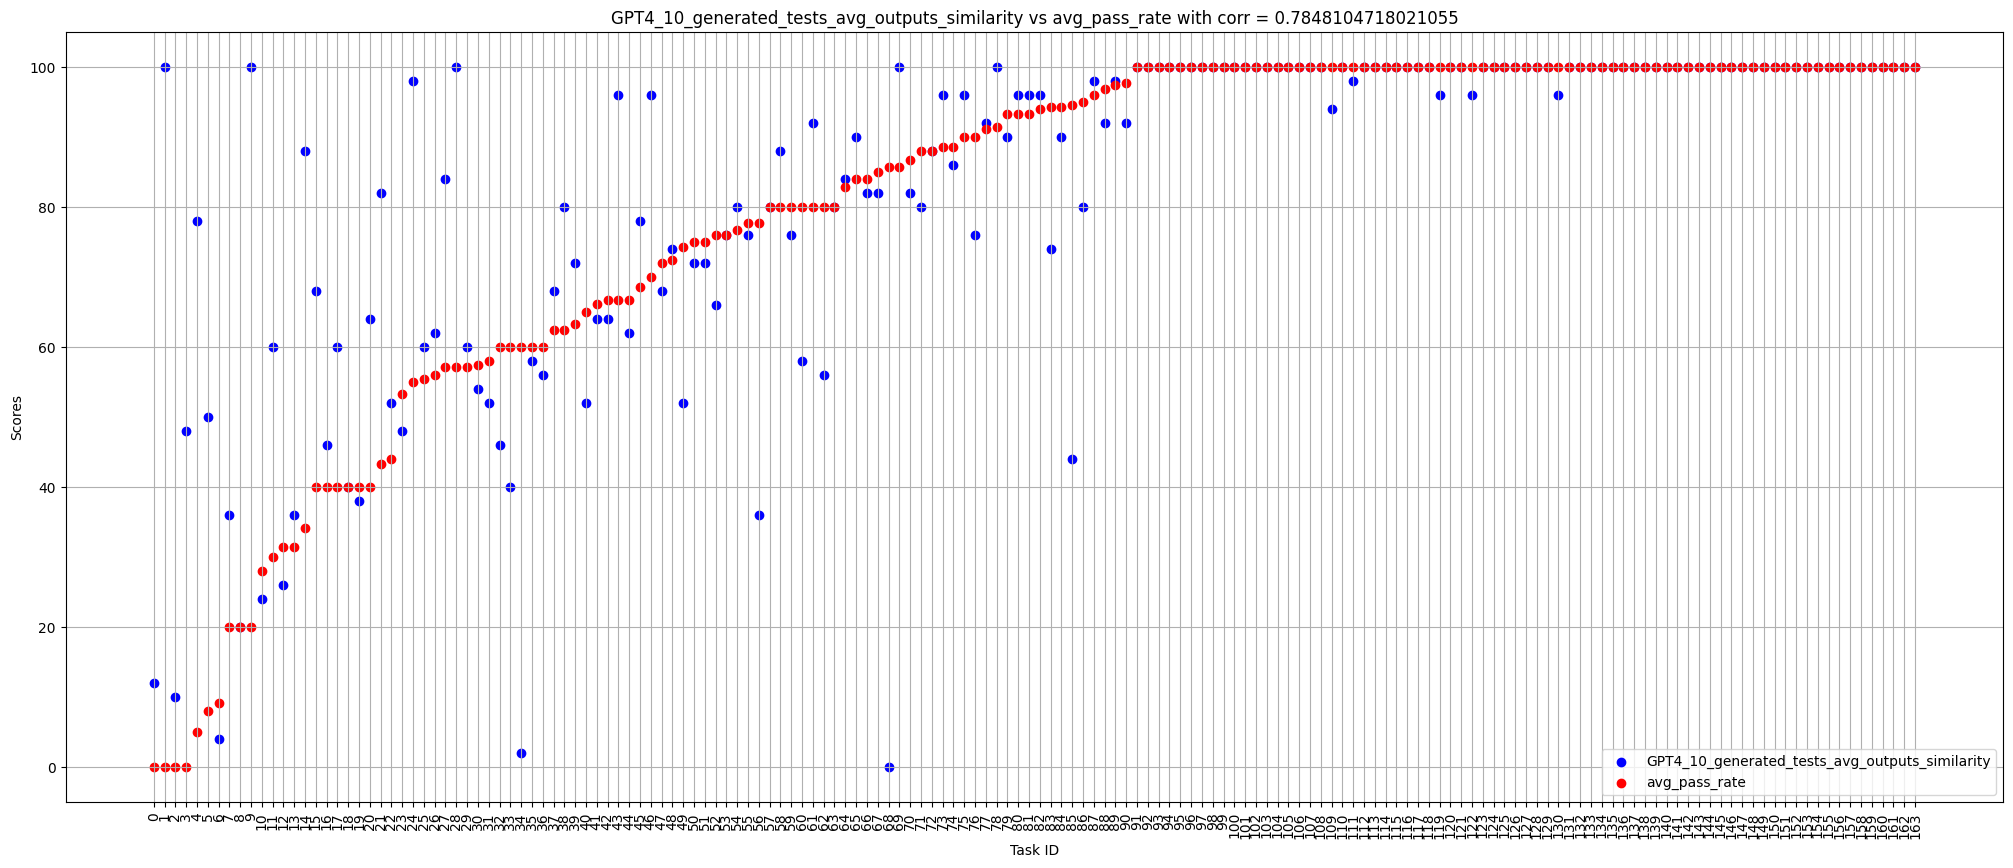

In [28]:
old_df = pd.read_csv('runs/Second run/test_cases_results.csv')
visualize_corr(old_df[old_df['avg_pass_rate'] <= 100].sort_values(by = 'avg_pass_rate'), 'avg_pass_rate', 'GPT4_10_generated_tests_avg_outputs_similarity')

The correlation between the average pass rate and GPT4_10_generated_tests_0.7_avg_outputs_similarity is 0.6139797692585071


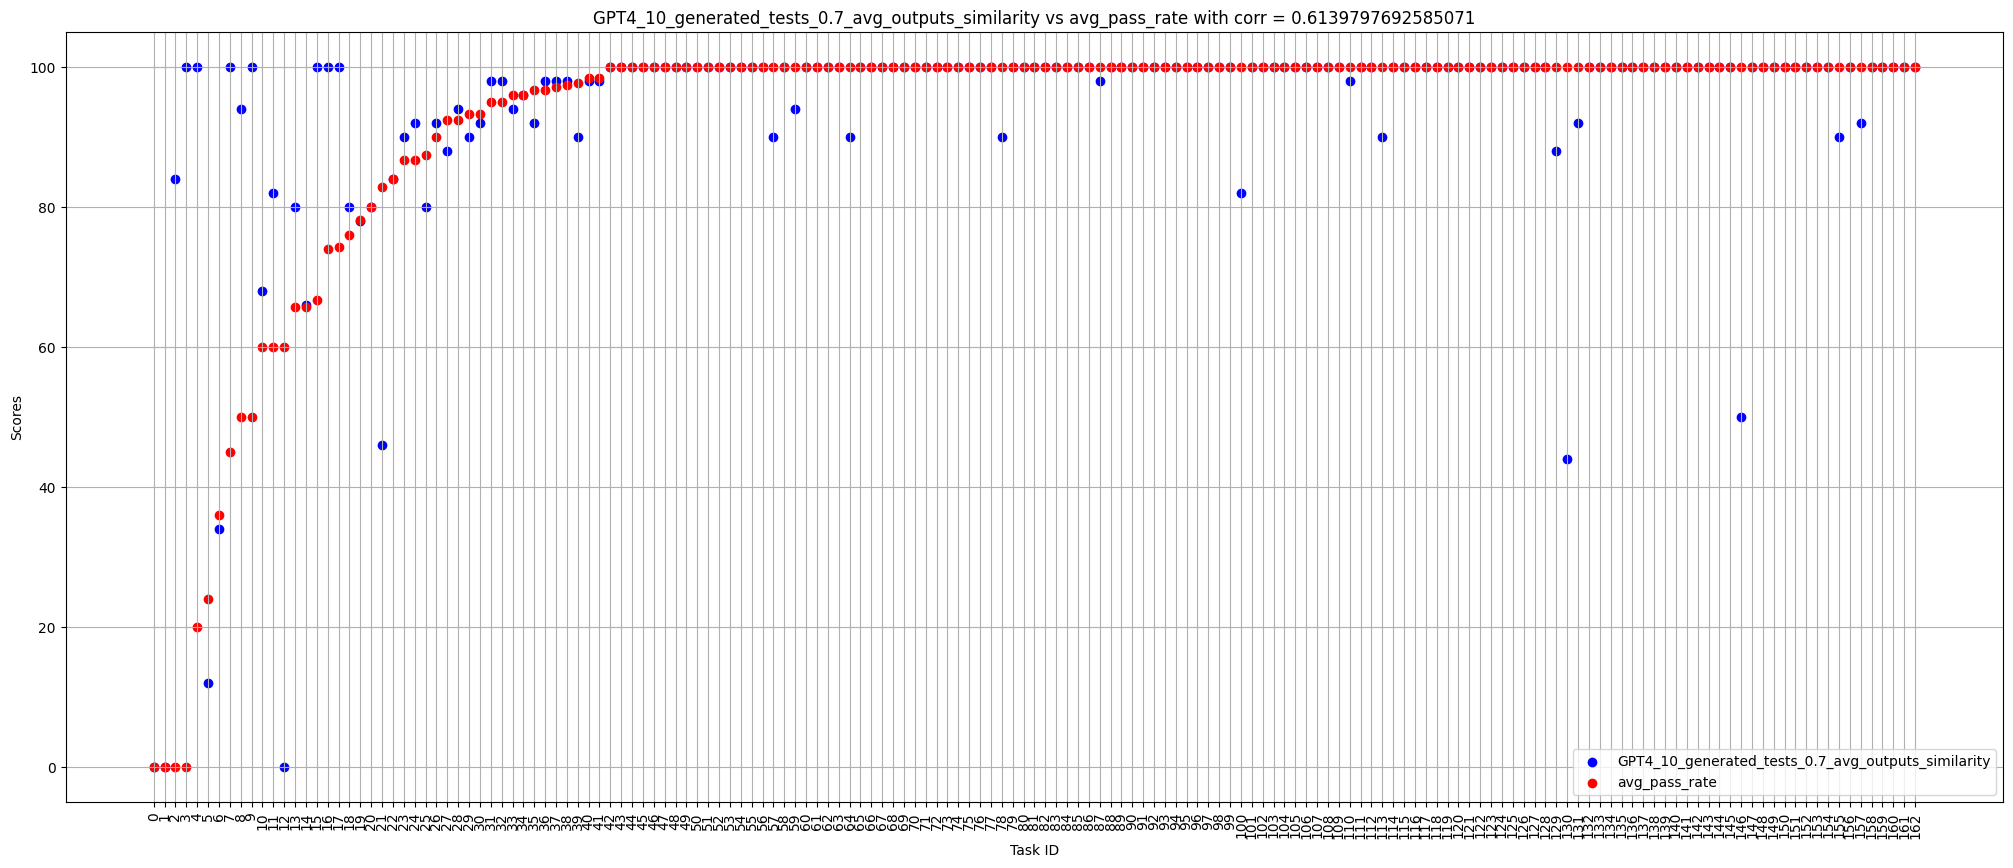

In [25]:
new_df = pd.read_csv('test_cases_results.csv')
visualize_corr(new_df[new_df['avg_pass_rate'] <= 100].sort_values(by = 'avg_pass_rate'), 'avg_pass_rate', f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity')

In [30]:
def calculate_distance_correlation(df, col1, col2):
    return dcor.distance_correlation(df[col1], df[col2])

col1 = 'avg_pass_rate'
col2_old = 'GPT4_10_generated_tests_avg_outputs_similarity'
col2_new = f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'

# Calculate the overall distance correlation for the old and new DataFrames
old_correlation = calculate_distance_correlation(old_df, 'avg_pass_rate', col2_old)
new_correlation = calculate_distance_correlation(new_df, 'avg_pass_rate', col2_new)

# Initialize an empty list to store rows that decrease correlation
rows_responsible_for_decrease = []

# Iterate over each row in the new DataFrame
for i in range(len(new_df)):
    # Remove the current row from the new DataFrame
    temp_df = new_df.drop(i)
    
    # Calculate distance correlation without the current row
    temp_correlation = calculate_distance_correlation(temp_df, 'avg_pass_rate', col2_new)
    
    # Check if the correlation increases without this row (i.e., removing it improved the correlation)
    if temp_correlation > new_correlation:
        rows_responsible_for_decrease.append(new_df.iloc[i])

# Convert the result into a DataFrame for easier analysis
rows_with_decreased_correlation = pd.DataFrame(rows_responsible_for_decrease)

print(f"Old Correlation: {old_correlation}")
print(f"New Correlation: {new_correlation}")
print("Rows that decreased the correlation:")
rows_with_decreased_correlation

Old Correlation: 0.7848104718021113
New Correlation: 0.6139797692585064
Rows that decreased the correlation:


,task_id,prompt,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_1_avg_outputs_similarity,GPT4_10_generated_tests_1_outputs,GPT4_10_generated_tests_1_outputs_similarity,GPT4_10_generated_tests_0.7_outputs,GPT4_10_generated_tests_0.7_outputs_similarity,GPT4_10_generated_tests_0.7_avg_outputs_similarity,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_1
9,HumanEval/9,"from typing import List, Tuple\n\n\ndef rollin...",from typing import List\n\ndef rolling_max(num...,from typing import List\n\ndef rolling_max(num...,from typing import List\n\ndef rolling_max(num...,from typing import List\n\ndef rolling_max(num...,from typing import List\n\ndef rolling_max(num...,from typing import List\n\ndef rolling_max(num...,95.000000,98.0,"[['[1, 2, 3, 3, 3, 4, 4]', '[1, 2, 3, 3, 3, 4,...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, ...","[['[1, 2, 3, 3, 3, 4, 4]', '[1, 2, 3, 3, 3, 4,...","[1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, ...",98.0,"rolling_max([1, 2, 3, 2, 3, 4, 2])#lak#rolling...","rolling_max([1, 2, 3, 2, 3, 4, 2])#lak#rolling..."
38,HumanEval/39,"\n\ndef prime_fib(n: int):\n """"""\n prime...",import sympy\n\ndef prime_fib(n: int) -> int:\...,import math\n\ndef is_prime(num: int) -> bool:...,from sympy import isprime\n\ndef prime_fib(n: ...,import sympy\n\ndef prime_fib(n: int) -> int:\...,from sympy import isprime\n\ndef prime_fib(n: ...,import sympy\n\ndef prime_fib(n: int) -> int:\...,20.000000,86.0,"[['2', '2', '2', '2', '2', '2'], ['3', '3', '3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8, ...","[['2', '2', '2', '2', '2', '2'], ['3', '3', '3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,prime_fib(1)#lak#prime_fib(2)#lak#prime_fib(3)...,prime_fib(1)#lak#prime_fib(2)#lak#prime_fib(3)...
41,HumanEval/42,"\n\ndef incr_list(l: list):\n """"""Return lis...","def incr_list(l: list) -> list:\n """"""Return...","def incr_list(l: list) -> list:\n """"""Return...","def incr_list(l: list):\n """"""Return list wi...","def incr_list(l: list):\n """"""Return list wi...","def incr_list(l: list) -> list:\n """"""Return...","def incr_list(l: list):\n """"""Return list wi...",100.000000,100.0,"[['[]', '[]', '[]', '[]', '[]', '[]'], ['[2, 3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['[2, 3, 4]', '[2, 3, 4]', '[2, 3, 4]', '[2, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",90.0,"incr_list([1, 2, 3])#lak#incr_list([])#lak#inc...","incr_list([])#lak#incr_list([1, 2, 3])#lak#inc..."
43,HumanEval/44,"\n\ndef change_base(x: int, base: int):\n ""...","def change_base(x: int, base: int) -> str:\n ...","def change_base(x: int, base: int) -> str:\n ...","def change_base(x: int, base: int) -> str:\n ...","def change_base(x: int, base: int) -> str:\n ...","def change_base(x: int, base: int) -> str:\n ...","def change_base(x: int, base: int) -> str:\n ...",100.000000,94.0,"[['1010', '1010', '1010', '1010', '1010', '101...","[1.0, 1.0, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['1111', '1111', '1111', '1111', '1111', '111...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4, 1.0, 1.0, ...",94.0,"change_base(15, 2)#lak#change_base(15, 8)#lak#...","change_base(10, 2)#lak#change_base(15, 4)#lak#..."
46,HumanEval/47,"\n\ndef median(l: list):\n """"""Return median...",from typing import List\n\ndef median(l: List[...,from typing import List\n\ndef median(l: List[...,from typing import List\n\ndef median(l: List[...,from typing import List\n\ndef median(l: List[...,import statistics\n\ndef median(l: list):\n ...,from typing import List\n\ndef median(l: List[...,100.000000,90.0,"[['2', '2', '2', '2', '2', '2'], ['10', '10', ...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['2', '2', '2', '2', '2', '2'], ['2.5', '2.5'...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",90.0,"median([1, 2, 3])#lak#median([2, 1, 3, 4])#lak...","median([1, 3, 2])#lak#median([10])#lak#median(..."
53,HumanEval/54,"\n\ndef same_chars(s0: str, s1: str):\n """"""...",from collections import Counter\n\

In [31]:
# get the rows with the same task_id in rows_with_decreased_correlation from the old_df
rows_with_decreased_correlation_old = old_df[old_df['task_id'].isin(rows_with_decreased_correlation['task_id'])]
rows_with_decreased_correlation_old

,task_id,prompt,GPT4_10_generated_tests,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_output,GPT4_10_generated_tests_outputs_similarity,GPT4_10_generated_tests_avg_outputs_similarity
9,HumanEval/9,"from typing import List, Tuple\n\n\ndef rollin...","rolling_max([1, 2, 3, 2, 3, 4, 2])#lak#rolling...","\nfrom typing import List, Tuple\n\ndef rollin...","\nfrom typing import List, Tuple\n\n\ndef roll...",\nfrom typing import List\n\n\ndef rolling_max...,\nfrom typing import List\n\n\ndef rolling_max...,\nfrom typing import List\n\ndef rolling_max(n...,"\nfrom typing import List, Tuple\n\n\ndef roll...",100.000000,"[['[1, 2, 3, 3, 3, 4, 4]', '[1, 2, 3, 3, 3, 4,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0
39,HumanEval/39,"\n\ndef prime_fib(n: int):\n """"""\n prime...",prime_fib(1)#lak#prime_fib(2)#lak#prime_fib(3)...,\nimport math\n\ndef is_prime(num):\n if nu...,\nimport math\n\ndef is_prime(num):\n if nu...,\nimport math\n\ndef is_prime(num):\n if nu...,\nimport math\n\ndef is_prime(num):\n if nu...,\nfrom math import isqrt\n\ndef is_prime(num):...,\nimport math\n\ndef is_prime(num):\n if nu...,20.000000,"[['', '2', '2', '2', '2', ''], ['', '3', '3', ...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",20.0
42,HumanEval/42,"\n\ndef incr_list(l: list):\n """"""Return lis...","incr_list([0])#lak#incr_list([1, 2, 3, 4, 5])#...",\nfrom typing import List\n\ndef incr_list(l: ...,\ndef incr_list(l: list):\n return [x + 1 f...,\nfrom typing import List\n\ndef incr_list(l: ...,\nfrom typing import List\n\ndef incr_list(l: ...,\nfrom typing import List\n\ndef incr_list(l: ...,\nfrom typing import List\n\ndef incr_list(lst...,100.000000,"[['[1]', '[1]', '[1]', '[1]', '[1]', '[1]'], [...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0
44,HumanEval/44,"\n\ndef change_base(x: int, base: int):\n ""...","change_base(15, 2)#lak#change_base(30, 8)#lak#...","\ndef change_base(x: int, base: int):\n """"""...","\ndef change_base(x: int, base: int):\n """"""...","\ndef change_base(x: int, base: int):\n """"""...","\ndef change_base(x: int, base: int):\n """"""...","\ndef change_base(x: int, base: int):\n """"""...","\ndef change_base(x: int, base: int):\n """"""...",100.000000,"[['1111', '1111', '1111', '1111', '1111', '111...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4, 1.0, 1.0, ...",94.0
47,HumanEval/47,"\n\ndef median(l: list):\n """"""Return median...","median([3, 1, 2, 4, 5])#lak#median([-10, 4, 6,...",\nfrom statistics import median\n\ndef median(...,\nfrom statistics import median\n\ndef median(...,\nfrom statistics import median\n\ndef median(...,\nfrom statistics import median\n\ndef median(...,\nfrom statistics import median\n\ndef median(...,\nfrom statistics import median\n\ndef median(...,0.000000,"[['', '', '', '', '', ''], ['', '', '', '', ''...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0
54,HumanEval/54,"\n\ndef same_chars(s0: str, s1: str):\n """"""...","same_chars('eabcdzzzz', 'dddzzzzzzzddeddabc')#...",\nfrom collections import Counter\n\ndef same_...,\nfrom collections import Counter\n\ndef same_...,"\ndef same_chars(s0: str, s1: str):\n from ...","\ndef same_chars(s0: str, s1: str):\n """"""\n...",\nfrom collections import Counter\n\ndef same_...,\nfrom collections import Counter\n\ndef same_...,57.142857,"[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0
64,HumanEval/64,"\nFIX = """"""\nAdd more test cases.\n""""""\n\ndef ...","vowels_count(""hello"")#lak#vowels_count(""random...",\ndef vowels_count(s):\n vowels = set('aeio...,"\ndef vowels_count(s):\n vowels = ['a', 'e'...","\ndef vowels_count(s):\n VOWELS = {'a', 'e'...","\ndef vowels_count(s):\n vowels = {'a', 'e'...",\ndef vowels_count(s: str) -> int:\n vowels...,"\ndef vowels_count(s):\n vowels = {'a', 'e'...",57.142857,"[['2', '1', '2', '2', '2', '2'], ['2', '2', '2...","[0.8, 1.0, 0.4, 0.4, 0.8, 0.4, 0.4, 0.6, 0.8, ...",60.0
75,HumanEval/

In [ ]:
%pip install seaborn

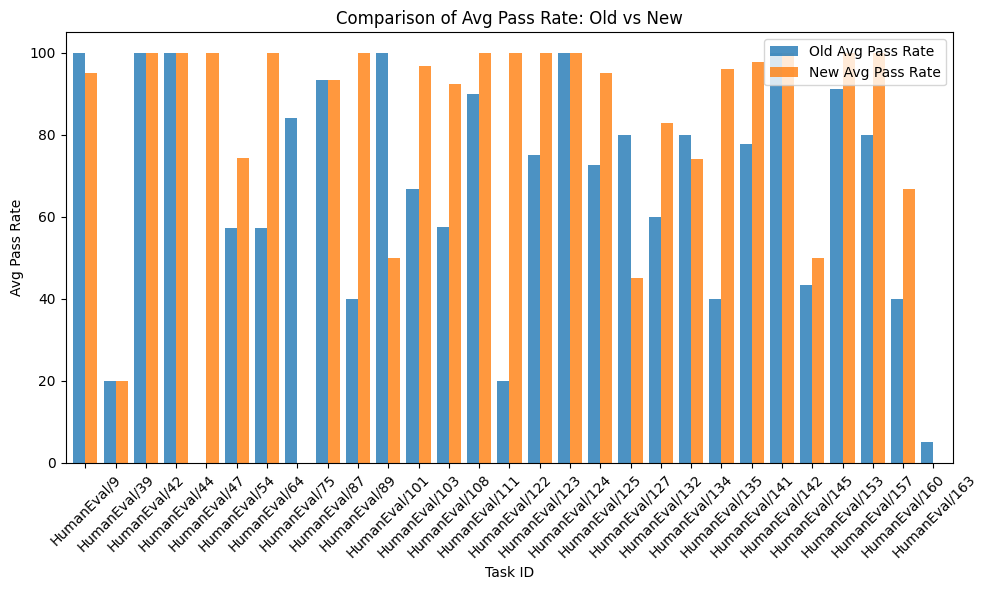

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Merge the old and new data based on task_id for comparison
comparison_df = pd.merge(
    rows_with_decreased_correlation_old[['task_id', 'avg_pass_rate']],
    rows_with_decreased_correlation[['task_id', 'avg_pass_rate']],
    on='task_id',
    suffixes=('_old', '_new')
)

# Plotting
plt.figure(figsize=(10, 6))

# Create the bar plot for old vs new avg_pass_rate
comparison_df.plot(x='task_id', kind='bar', ax=plt.gca(),
                   color=['#1f77b4', '#ff7f0e'], alpha=0.8, width=0.8)

# Add labels and title
plt.xlabel('Task ID')
plt.ylabel('Avg Pass Rate')
plt.title('Comparison of Avg Pass Rate: Old vs New')
plt.legend(['Old Avg Pass Rate', 'New Avg Pass Rate'])

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd

# Merge old and new DataFrames on task_id to compare avg_pass_rate
comparison_df = pd.merge(
    rows_with_decreased_correlation_old[['task_id', 'avg_pass_rate']],
    rows_with_decreased_correlation[['task_id', 'avg_pass_rate']],
    on='task_id',
    suffixes=('_old', '_new')
)

# Calculate the difference between old and new avg_pass_rate
comparison_df['avg_pass_rate_diff'] = comparison_df['avg_pass_rate_new'] - comparison_df['avg_pass_rate_old']

# Get statistics about the differences
total_different = (comparison_df['avg_pass_rate_diff'] != 0).sum()  # Count of rows with different avg_pass_rate
positive_diff = (comparison_df['avg_pass_rate_diff'] > 0).sum()  # Count of rows where new avg_pass_rate is higher
negative_diff = (comparison_df['avg_pass_rate_diff'] < 0).sum()  # Count of rows where new avg_pass_rate is lower
avg_difference = comparison_df['avg_pass_rate_diff'].mean()  # Average difference
max_diff = comparison_df['avg_pass_rate_diff'].max()  # Maximum difference
min_diff = comparison_df['avg_pass_rate_diff'].min()  # Minimum difference

# Display the statistics
print(f"Total rows with different avg_pass_rate: {total_different}")
print(f"Rows with positive difference (new > old): {positive_diff}")
print(f"Rows with negative difference (new < old): {negative_diff}")
print(f"Average difference in avg_pass_rate: {avg_difference}")
print(f"Maximum difference in avg_pass_rate: {max_diff}")
print(f"Minimum difference in avg_pass_rate: {min_diff}")

print((comparison_df['avg_pass_rate_diff'] > 20).sum())
print((comparison_df['avg_pass_rate_diff'] < -80).sum())
# Display the rows with the highest positive difference
print(comparison_df.sort_values(by='avg_pass_rate_diff', ascending=False).head())

# Display the rows with the highest negative difference
comparison_df.sort_values(by='avg_pass_rate_diff').head()

Total rows with different avg_pass_rate: 23
Rows with positive difference (new > old): 17
Rows with negative difference (new < old): 6
Average difference in avg_pass_rate: 13.744116037219486
Maximum difference in avg_pass_rate: 100.0
Minimum difference in avg_pass_rate: -84.0
11
1
          task_id  avg_pass_rate_old  avg_pass_rate_new  avg_pass_rate_diff
4    HumanEval/47           0.000000              100.0          100.000000
14  HumanEval/122          20.000000              100.0           80.000000
9    HumanEval/89          40.000000              100.0           60.000000
21  HumanEval/135          40.000000               96.0           56.000000
6    HumanEval/64          57.142857              100.0           42.857143


,task_id,avg_pass_rate_old,avg_pass_rate_new,avg_pass_rate_diff
7,HumanEval/75,84.0,0.0,-84.0
10,HumanEval/101,100.0,50.0,-50.0
18,HumanEval/127,80.0,45.0,-35.0
20,HumanEval/134,80.0,74.0,-6.0
0,HumanEval/9,100.0,95.0,-5.0
